<a href="https://colab.research.google.com/github/thanchanok-a/thanchanok-a/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
%matplotlib inline

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1OqSqeSt1fXpg8KfubMS18BHeK7rUsSXj/export?format=csv&gid=2079195745#gid=2079195745')
df.head(5)

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,Approval
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [ ]:
df.tail(5)

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,Approval
595,ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,ID12699,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO
599,ID12700,38,MALE,TOWN,26671.60,NO,0,YES,NO,YES,YES,YES


In [ ]:
df.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [ ]:
df.nunique()

,0
id,600
age,50
sex,2
region,4
income,599
married,2
children,4
car,2
save_act,2
current_act,2


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
region,0
income,0
married,0
children,0
car,0
save_act,0
current_act,0


In [ ]:
# Checking the types and null values of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  Approval     600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


In [ ]:
# Checking duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape[0])

number of duplicate rows: 0


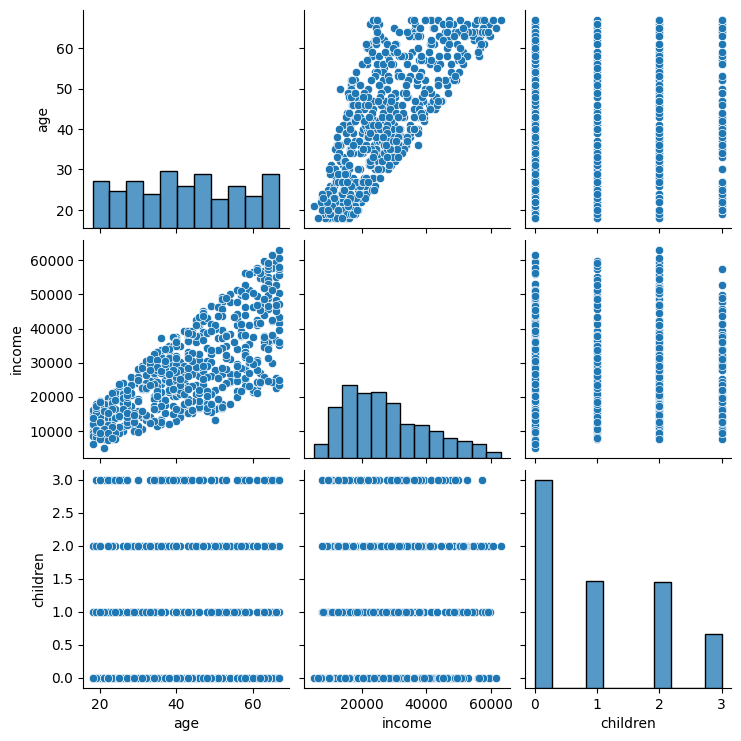

In [ ]:
sns.pairplot(df);

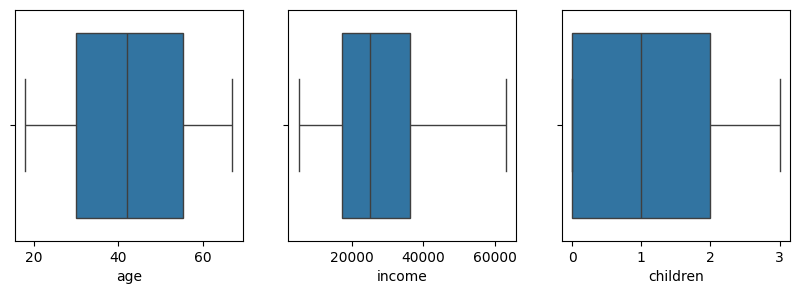

In [ ]:
# Detecting Outliers
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
columns = ['age', 'income', 'children']
for i, column in enumerate(columns):
  sns.boxplot(x=df[column], ax=ax[i]);

In [ ]:
Q1_age = df.age.quantile(0.25)
Q3_age = df.age.quantile(0.75)
IQR_age = Q3_age - Q1_age
print('Age IQR:', IQR_age)

Age IQR: 25.25


In [ ]:
Q1_income = df.income.quantile(0.25)
Q3_income = df.income.quantile(0.75)
IQR_income = Q3_income - Q1_income
print('Income IQR:', IQR_income)

Income IQR: 18908.174999999996


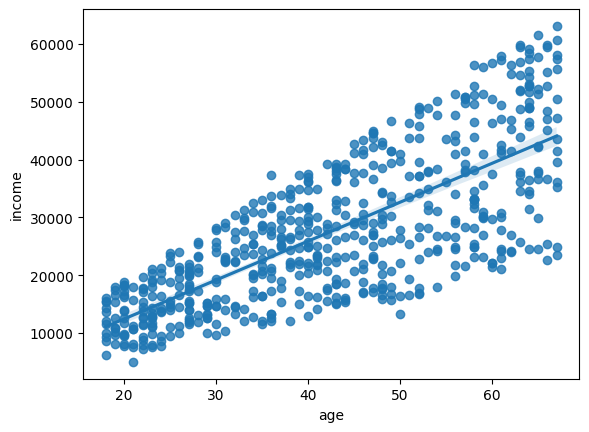

In [ ]:
# Regression Plot
sns.regplot(data=df, x='age', y='income');

In [ ]:
# Pass only numeric columns for correlation matrix
c = df[['age', 'income', 'children']].corr()
c

,age,income,children
age,1.000000,0.752726,0.023572
income,0.752726,1.000000,0.036761
children,0.023572,0.036761,1.000000


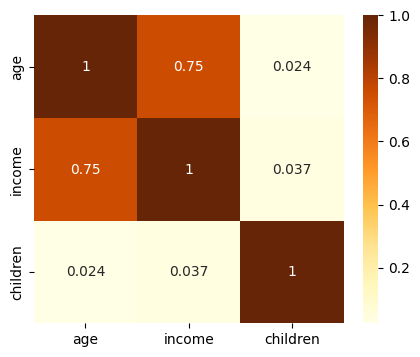

In [ ]:
# Heat Maps
plt.figure(figsize=(5, 4))
sns.heatmap(c, cmap="YlOrBr", annot=True);

In [ ]:
# Import the libralies for KNeighbors and Naive Bayes Classifiers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
    )

In [ ]:
# Creating dummy variable from LabelEncoder
le = preprocessing.LabelEncoder()

In [ ]:
df['sex_encoded']         = le.fit_transform(df.sex)
df['region_encoded']      = le.fit_transform(df.region)
df['married_encoded']     = le.fit_transform(df.married)
df['car_encoded']         = le.fit_transform(df.car)
df['save_act_encoded']    = le.fit_transform(df.save_act)
df['current_act_encoded'] = le.fit_transform(df.current_act)
df['mortgage_encoded']    = le.fit_transform(df.mortgage)
df['Approval_encoded']    = le.fit_transform(df.Approval)

In [ ]:
# Create 5 equal-width bins of age and assign numeric labels
df['age_bin_class'] = pd.cut(df['age'], bins=5, labels=range(1, 6))

In [ ]:
# Create 10 equal-width bins of income and assign numeric labels
df['income_bin_class'] = pd.cut(df['income'], bins=10, labels=range(1, 11))

In [ ]:
df.head(10)

,id,age,sex,region,income,married,children,car,save_act,current_act,...,sex_encoded,region_encoded,married_encoded,car_encoded,save_act_encoded,current_act_encoded,mortgage_encoded,Approval_encoded,age_bin_class,income_bin_class
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,...,0,0,0,0,0,0,0,1,4,3
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,...,1,3,1,1,0,1,1,0,3,5
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,...,0,0,1,1,1,1,0,0,4,2
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,...,0,3,1,0,0,1,0,0,1,3
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,...,0,1,1,0,1,0,0,0,4,8
5,ID12106,57,FEMALE,TOWN,37869.60,YES,2,NO,YES,YES,...,0,3,1,0,1,1,0,1,4,6
6,ID12107,22,MALE,RURAL,8877.07,NO,0,NO,NO,YES,...,1,1,0,0,0,1,0,1,1,1
7,ID12108,58,MALE,TOWN,24946.60,YES,0,YES,YES,YES,...,1,3,1,1,1,1,0,0,5,4
8,ID12109,37,FEMALE,SUBURBAN,25304.30,YES,2,YES,NO,NO,...,0,2,1,1,0,0,0,0,2,4
9,ID12110,54,MALE,TOWN,24212.10,YES,2,YES,YES,YES,...,1,3,1,1,1,1,0,0,4,4


In [ ]:
# Split dataset in features and target variable
feature_cols = ['age_bin_class', 'sex_encoded', 'region_encoded', 'income_bin_class', 'married_encoded',
                'children', 'car_encoded', 'save_act_encoded', 'current_act_encoded', 'mortgage_encoded']
X = df[feature_cols] # Features
y = df.Approval_encoded # Target variable

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_train.head()

,age_bin_class,sex_encoded,region_encoded,income_bin_class,married_encoded,children,car_encoded,save_act_encoded,current_act_encoded,mortgage_encoded
145,5,1,2,8,1,0,0,1,0,1
148,5,1,1,4,1,0,1,1,0,0
560,3,1,0,2,0,1,0,1,1,0
446,4,0,3,7,1,0,0,1,1,0
162,4,0,3,3,0,3,0,0,1,0


### K-Neighbors Classifier

In [ ]:
knn_model = KNeighborsClassifier()
knn_model

KNeighborsClassifier()

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_knn_pred = knn_model.predict(X_test)
print('KNN Accuracy:', accuracy_score(y_test, y_knn_pred))

KNN Accuracy: 0.7611111111111111


In [ ]:
knn_cm = confusion_matrix(y_test, y_knn_pred)
knn_cm

array([[79, 21],
       [22, 58]])

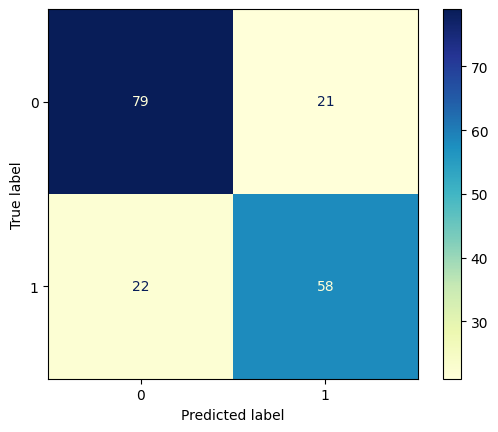

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_model.classes_).plot(cmap="YlGnBu");

In [ ]:
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       100
           1       0.73      0.72      0.73        80

    accuracy                           0.76       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.76      0.76      0.76       180



In [ ]:
print("KNN Accuracy: ", accuracy_score(y_test, y_knn_pred))
print("KNN Precision:", precision_score(y_test, y_knn_pred))
print("KNN Recall:   ", recall_score(y_test, y_knn_pred))
print("KNN F1:       ", f1_score(y_test, y_knn_pred))

KNN Accuracy:  0.7611111111111111
KNN Precision: 0.7341772151898734
KNN Recall:    0.725
KNN F1:        0.7295597484276729


### Naive Bayes Classifier

In [ ]:
nb_model = GaussianNB()
nb_model

GaussianNB()

In [ ]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_nb_pred = nb_model.predict(X_test)
print('NB Accuracy:', accuracy_score(y_test, y_nb_pred))

NB Accuracy: 0.5944444444444444


In [ ]:
nb_cm = confusion_matrix(y_test, y_nb_pred)
nb_cm

array([[65, 35],
       [38, 42]])

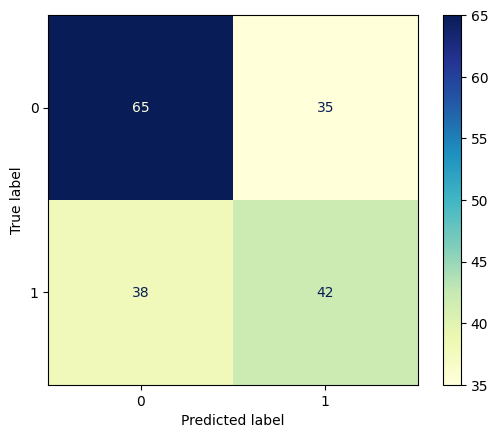

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb_model.classes_).plot(cmap="YlGnBu");

In [ ]:
print(classification_report(y_test, y_nb_pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       100
           1       0.55      0.53      0.54        80

    accuracy                           0.59       180
   macro avg       0.59      0.59      0.59       180
weighted avg       0.59      0.59      0.59       180



In [ ]:
print("NB Accuracy: ", accuracy_score(y_test, y_nb_pred))
print("NB Precision:", precision_score(y_test, y_nb_pred))
print("NB Recall:   ", recall_score(y_test, y_nb_pred))
print("NB F1:       ", f1_score(y_test, y_nb_pred))

NB Accuracy:  0.5944444444444444
NB Precision: 0.5454545454545454
NB Recall:    0.525
NB F1:        0.535031847133758
